In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
from matplotlib import pyplot as plt # for visualizing data
import re # for regular expression

In [3]:
# Dataset Link: https://www.kaggle.com/datasets?search=yoga&fileType=csv
data=pd.read_csv("C:/Users/HOME/Desktop/VS code Files/Tasks/Kaggle_dataset_EDA/Yoga and Meditation - Form Responses 1.csv")
data

,sr no,Timestamp,ID,Age,Are you practicing yoga/meditation everyday?,Is practicing yoga/meditation necessary?,"According to you, how much time one should take out from regular routine for practicing yoga?",What do you think are the benefits of practicing yoga on regular basis?,Are you working from office/home or attending online lectures?,For how many hours you have to work and use laptop/phone? (put No if not applicable),Do you feel stressed due to work load?,What do you think? will Meditation help you in reducing the stress?
0,1,9/23/2020 11:34:10,ab12,19,No,Maybe,1hr,Patience of a person increases,Yes,8hrs,Yes,Maybe
1,2,9/23/2020 11:35:38,at13,20,Yes,Yes,About 1 hour atleast,"It helps us in reducing stress, and helps in living healthy and cheerful life.",Yes,More than 8 hours,Sometimes,Yes
2,3,9/23/2020 11:38:04,mm31,19,No,Yes,2 hours,"Focus, Peace of mind, clears your head.",Yes,5 hours,Yes,Yes it will!
3,4,9/23/2020 11:38:37,wr34,19,Sometimes,Yes,15 min,Find Inner peace,Yes,10 hrs,Yes,Yes
4,5,9/23/2020 11:40:38,mt56,19,No,Yes,1hr,it helps to stay healthy,Yes,5,Yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
42,43,9/24/2020 8:37:15,sj22,19,Yes,Yes,One hour is more than sufficient,Fresh start of day.\nIncreases body flexibility.\nEnsures increased blood circulation in the entire body and increased heartbeat is necessary to have good health.\nSweating also has health benefits.\nHelps increasing concentration.,Yes,8 hours,Sometimes,Definitely. But practicing meditation daily is difficult than practicing exercise.
43,44,9/24/2020 9:33:32,mg65,20,Sometimes,Yes,1 hour,Release the stress,Yes,NaN,Yes,Yess
44,45,9/24/2020 10:10:56,am09,19,Sometimes,Yes,10 mins,peace,Yes,4,Yes,yes
45,46,9/24/2020 12:02:14,sh55,20,No,Yes,20 Min,"Healthy body, Refreshing mind",Yes,5,Yes,Yes


In [4]:
# checking the column names and its datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   sr no                                                                                          47 non-null     int64 
 1   Timestamp                                                                                      47 non-null     object
 2   ID                                                                                             47 non-null     object
 3   Age                                                                                            47 non-null     int64 
 4   Are you practicing yoga/meditation everyday?                                                   47 non-null     object
 5   Is practicing yoga/meditation n

In [5]:
# To see first 5 rows
data.head()

,sr no,Timestamp,ID,Age,Are you practicing yoga/meditation everyday?,Is practicing yoga/meditation necessary?,"According to you, how much time one should take out from regular routine for practicing yoga?",What do you think are the benefits of practicing yoga on regular basis?,Are you working from office/home or attending online lectures?,For how many hours you have to work and use laptop/phone? (put No if not applicable),Do you feel stressed due to work load?,What do you think? will Meditation help you in reducing the stress?
0,1,9/23/2020 11:34:10,ab12,19,No,Maybe,1hr,Patience of a person increases,Yes,8hrs,Yes,Maybe
1,2,9/23/2020 11:35:38,at13,20,Yes,Yes,About 1 hour atleast,"It helps us in reducing stress, and helps in living healthy and cheerful life.",Yes,More than 8 hours,Sometimes,Yes
2,3,9/23/2020 11:38:04,mm31,19,No,Yes,2 hours,"Focus, Peace of mind, clears your head.",Yes,5 hours,Yes,Yes it will!
3,4,9/23/2020 11:38:37,wr34,19,Sometimes,Yes,15 min,Find Inner peace,Yes,10 hrs,Yes,Yes
4,5,9/23/2020 11:40:38,mt56,19,No,Yes,1hr,it helps to stay healthy,Yes,5,Yes,no


In [6]:
#last 5rows
data.tail()

,sr no,Timestamp,ID,Age,Are you practicing yoga/meditation everyday?,Is practicing yoga/meditation necessary?,"According to you, how much time one should take out from regular routine for practicing yoga?",What do you think are the benefits of practicing yoga on regular basis?,Are you working from office/home or attending online lectures?,For how many hours you have to work and use laptop/phone? (put No if not applicable),Do you feel stressed due to work load?,What do you think? will Meditation help you in reducing the stress?
42,43,9/24/2020 8:37:15,sj22,19,Yes,Yes,One hour is more than sufficient,Fresh start of day.\nIncreases body flexibility.\nEnsures increased blood circulation in the entire body and increased heartbeat is necessary to have good health.\nSweating also has health benefits.\nHelps increasing concentration.,Yes,8 hours,Sometimes,Definitely. But practicing meditation daily is difficult than practicing exercise.
43,44,9/24/2020 9:33:32,mg65,20,Sometimes,Yes,1 hour,Release the stress,Yes,NaN,Yes,Yess
44,45,9/24/2020 10:10:56,am09,19,Sometimes,Yes,10 mins,peace,Yes,4,Yes,yes
45,46,9/24/2020 12:02:14,sh55,20,No,Yes,20 Min,"Healthy body, Refreshing mind",Yes,5,Yes,Yes
46,47,9/24/2020 21:31:26,jw43,20,Sometimes,Yes,According to me atleast half an hour...to calm the anxiety.,"Helps in getting calm,relieves stress,increases stamina",Yes,16 hours,Yes,"Yesss...but managing between work,sleep and meditation is really getting tough"


In [22]:
#check the null values
data.isnull().sum()

sr no                                                                                            0
Timestamp                                                                                        0
ID                                                                                               0
Age                                                                                              0
Are you practicing yoga/meditation everyday?                                                     0
Is practicing yoga/meditation necessary?                                                         0
According to you, how much time one should take out from regular routine for practicing yoga?    0
What do you think are the benefits of practicing yoga on regular basis?                          0
Are you working from office/home or attending online lectures?                                   0
For how many hours you have to work and use laptop/phone? (put  No if not applicable)            0
Do you fee

In [23]:
#remove null values
data.dropna(axis=0,inplace=True)

In [24]:
# Checking if null values got removed or not
data.isnull().sum()

sr no                                                                                            0
Timestamp                                                                                        0
ID                                                                                               0
Age                                                                                              0
Are you practicing yoga/meditation everyday?                                                     0
Is practicing yoga/meditation necessary?                                                         0
According to you, how much time one should take out from regular routine for practicing yoga?    0
What do you think are the benefits of practicing yoga on regular basis?                          0
Are you working from office/home or attending online lectures?                                   0
For how many hours you have to work and use laptop/phone? (put  No if not applicable)            0
Do you fee

In [25]:
data.shape

(45, 12)

In [26]:
# Summary Statistics
data.describe()

,sr no,Age
count,45.000000,45.000000
mean,23.155556,20.266667
std,13.392596,2.260330
min,1.000000,16.000000
25%,12.000000,19.000000
50%,23.000000,20.000000
75%,34.000000,20.000000
max,47.000000,32.000000


In [29]:
data

,sr no,Timestamp,ID,Age,Are you practicing yoga/meditation everyday?,Is practicing yoga/meditation necessary?,"According to you, how much time one should take out from regular routine for practicing yoga?",What do you think are the benefits of practicing yoga on regular basis?,Are you working from office/home or attending online lectures?,For how many hours you have to work and use laptop/phone? (put No if not applicable),Do you feel stressed due to work load?,What do you think? will Meditation help you in reducing the stress?
0,1,9/23/2020 11:34:10,ab12,19,No,Maybe,1hr,Patience of a person increases,Yes,8hrs,Yes,Maybe
1,2,9/23/2020 11:35:38,at13,20,Yes,Yes,About 1 hour atleast,"It helps us in reducing stress, and helps in living healthy and cheerful life.",Yes,More than 8 hours,Sometimes,Yes
2,3,9/23/2020 11:38:04,mm31,19,No,Yes,2 hours,"Focus, Peace of mind, clears your head.",Yes,5 hours,Yes,Yes it will!
3,4,9/23/2020 11:38:37,wr34,19,Sometimes,Yes,15 min,Find Inner peace,Yes,10 hrs,Yes,Yes
4,5,9/23/2020 11:40:38,mt56,19,No,Yes,1hr,it helps to stay healthy,Yes,5,Yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
40,41,9/23/2020 22:16:37,ys24,21,Sometimes,Yes,1 hour,"Relaxes mind,improve focus.",Yes,7-8 hours,Sometimes,Yes
42,43,9/24/2020 8:37:15,sj22,19,Yes,Yes,One hour is more than sufficient,Fresh start of day.\nIncreases body flexibility.\nEnsures increased blood circulation in the entire body and increased heartbeat is necessary to have good health.\nSweating also has health benefits.\nHelps increasing concentration.,Yes,8 hours,Sometimes,Definitely. But practicing meditation daily is difficult than practicing exercise.
44,45,9/24/2020 10:10:56,am09,19,Sometimes,Yes,10 mins,peace,Yes,4,Yes,yes
45,46,9/24/2020 12:02:14,sh55,20,No,Yes,20 Min,"Healthy body, Refreshing mind",Yes,5,Yes,Yes


In [31]:
# fro checking datatype of each column
data.dtypes

sr no                                                                                             int64
Timestamp                                                                                        object
ID                                                                                               object
Age                                                                                               int64
Are you practicing yoga/meditation everyday?                                                     object
Is practicing yoga/meditation necessary?                                                         object
According to you, how much time one should take out from regular routine for practicing yoga?    object
What do you think are the benefits of practicing yoga on regular basis?                          object
Are you working from office/home or attending online lectures?                                   object
For how many hours you have to work and use laptop/phone? (put  

In [32]:
# checking the values present in 'What do you think are the benefits of practicing yoga on regular basis?' column
data['For how many hours you have to work and use laptop/phone? (put  No if not applicable)'].values

array(['8hrs', 'More than 8 hours', '5 hours', '10 hrs', '5', '3 hr',
       '10', '9028414855', '5 hours', '3-4 hrs', '8to9 hours',
       'Around 4 hrs', '8 hours', '6/7 hr', '8-9 hours', '6', '9-10 hr',
       '4-5 hours', '12 hr', '5-6 hrs', 'Around 10 hrs', '13-15 hrs',
       '7 hours', '4-5 hours ', '6 to 7 hrs', '05-Jun', '11 hours', '7',
       '5', '10 hrs a day', 'More than 10', '6', '. ', '9', '4 hr',
       'All day long', '8+', "Don't know ", '10-12 hrs', '9 hrs',
       '7-8 hours', '8 hours', '4', '5', '16 hours'], dtype=object)

In [42]:
# For removing all the string data in For 'how many hours you have to work and use laptop/phone? (put  No if not applicable)' 
# column and only numbers has to be present
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    data['For how many hours you have to work and use laptop/phone? (put  No if not applicable)'] = data['For how many hours you have to work and use laptop/phone? (put  No if not applicable)'].astype(str).apply(lambda x : x.replace(i, ''))
    
regex = [r'[+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    data['For how many hours you have to work and use laptop/phone? (put  No if not applicable)'] = data['For how many hours you have to work and use laptop/phone? (put  No if not applicable)'].astype(str).apply(lambda x : re.sub(j, '', x))
    

In [43]:
data

,sr no,Timestamp,ID,Age,Are you practicing yoga/meditation everyday?,Is practicing yoga/meditation necessary?,"According to you, how much time one should take out from regular routine for practicing yoga?",What do you think are the benefits of practicing yoga on regular basis?,Are you working from office/home or attending online lectures?,For how many hours you have to work and use laptop/phone? (put No if not applicable),Do you feel stressed due to work load?,What do you think? will Meditation help you in reducing the stress?
0,1,9/23/2020 11:34:10,ab12,19,No,Maybe,1hr,Patience of a person increases,Yes,8,Yes,Maybe
1,2,9/23/2020 11:35:38,at13,20,Yes,Yes,About 1 hour atleast,"It helps us in reducing stress, and helps in living healthy and cheerful life.",Yes,8,Sometimes,Yes
2,3,9/23/2020 11:38:04,mm31,19,No,Yes,2 hours,"Focus, Peace of mind, clears your head.",Yes,5,Yes,Yes it will!
3,4,9/23/2020 11:38:37,wr34,19,Sometimes,Yes,15 min,Find Inner peace,Yes,10,Yes,Yes
4,5,9/23/2020 11:40:38,mt56,19,No,Yes,1hr,it helps to stay healthy,Yes,5,Yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
40,41,9/23/2020 22:16:37,ys24,21,Sometimes,Yes,1 hour,"Relaxes mind,improve focus.",Yes,7-8,Sometimes,Yes
42,43,9/24/2020 8:37:15,sj22,19,Yes,Yes,One hour is more than sufficient,Fresh start of day.\nIncreases body flexibility.\nEnsures increased blood circulation in the entire body and increased heartbeat is necessary to have good health.\nSweating also has health benefits.\nHelps increasing concentration.,Yes,8,Sometimes,Definitely. But practicing meditation daily is difficult than practicing exercise.
44,45,9/24/2020 10:10:56,am09,19,Sometimes,Yes,10 mins,peace,Yes,4,Yes,yes
45,46,9/24/2020 12:02:14,sh55,20,No,Yes,20 Min,"Healthy body, Refreshing mind",Yes,5,Yes,Yes


In [45]:
# To convert responses in binary form example - 0,1,2
# Are you practicing yoga/meditation everyday? : 0-no 1-sometimes 2-yes
# Is practicing yoga/meditation necessary? : 0-maybe 1-yes
# Are you working from office/home or attending online lectures? : 1-yes 0-no
# Do you feel stressed due to work load? : 1-yes 2-sometimes 0-no
from sklearn.preprocessing import LabelEncoder

data1 = data.copy(deep = True)
le_everyday = LabelEncoder()
data1['Are you practicing yoga/meditation everyday?'] = le_everyday.fit_transform(data['Are you practicing yoga/meditation everyday?'])

le_necessary = LabelEncoder()
data1['Is practicing yoga/meditation necessary?'] = le_necessary.fit_transform(data['Is practicing yoga/meditation necessary?'])


le_workmode = LabelEncoder()
data1['Are you working from office/home or attending online lectures?'] = le_workmode.fit_transform(data['Are you working from office/home or attending online lectures?'])


le_workload = LabelEncoder()
data1['Do you feel stressed due to work load?'] = le_workload.fit_transform(data['Do you feel stressed due to work load?'])

In [47]:
data1

,sr no,Timestamp,ID,Age,Are you practicing yoga/meditation everyday?,Is practicing yoga/meditation necessary?,"According to you, how much time one should take out from regular routine for practicing yoga?",What do you think are the benefits of practicing yoga on regular basis?,Are you working from office/home or attending online lectures?,For how many hours you have to work and use laptop/phone? (put No if not applicable),Do you feel stressed due to work load?,What do you think? will Meditation help you in reducing the stress?
0,1,9/23/2020 11:34:10,ab12,19,0,0,1hr,Patience of a person increases,1,8,2,Maybe
1,2,9/23/2020 11:35:38,at13,20,2,1,About 1 hour atleast,"It helps us in reducing stress, and helps in living healthy and cheerful life.",1,8,1,Yes
2,3,9/23/2020 11:38:04,mm31,19,0,1,2 hours,"Focus, Peace of mind, clears your head.",1,5,2,Yes it will!
3,4,9/23/2020 11:38:37,wr34,19,1,1,15 min,Find Inner peace,1,10,2,Yes
4,5,9/23/2020 11:40:38,mt56,19,0,1,1hr,it helps to stay healthy,1,5,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...
40,41,9/23/2020 22:16:37,ys24,21,1,1,1 hour,"Relaxes mind,improve focus.",1,7-8,1,Yes
42,43,9/24/2020 8:37:15,sj22,19,2,1,One hour is more than sufficient,Fresh start of day.\nIncreases body flexibility.\nEnsures increased blood circulation in the entire body and increased heartbeat is necessary to have good health.\nSweating also has health benefits.\nHelps increasing concentration.,1,8,1,Definitely. But practicing meditation daily is difficult than practicing exercise.
44,45,9/24/2020 10:10:56,am09,19,1,1,10 mins,peace,1,4,2,yes
45,46,9/24/2020 12:02:14,sh55,20,0,1,20 Min,"Healthy body, Refreshing mind",1,5,2,Yes


In [50]:
# importing matplotlib libraries for visualization
import plotly.express as px
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

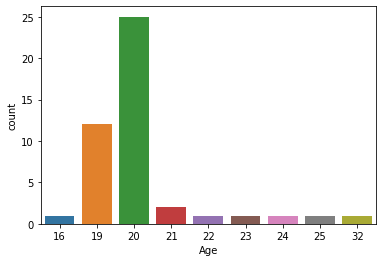

In [52]:
# To see count of different age group people
w = sns.countplot(data=data1,x="Age", y=None)
plt.show()

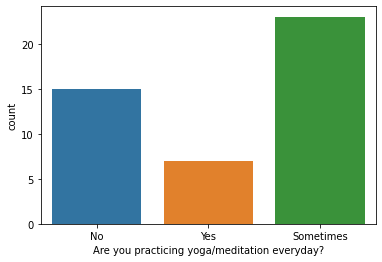

In [56]:
# To check how many people are practicing yoga everyday based on responses provided as yes, no and sometimes
x = sns.countplot(data=data,x="Are you practicing yoga/meditation everyday?", y=None)
plt.show()


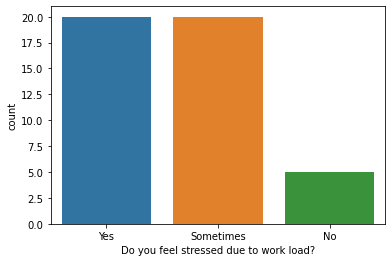

In [57]:
# To check how many people are stressed due to work load
y = sns.countplot(data=data,x="Do you feel stressed due to work load?", y=None)
plt.show()

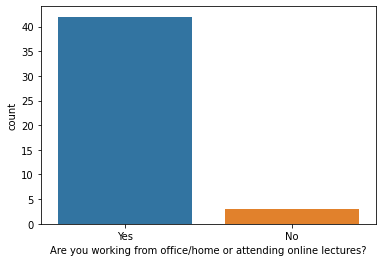

In [59]:
# To check how many people are working professionals
z = sns.countplot(data=data,x="Are you working from office/home or attending online lectures?", y=None)
plt.show()

## Inference

* After the analysis of 47 students/workers, the conclusion which comes out is, nowadays, the lifestyle of everyone has changed and most of the students/workers are spending lots of time in front of computer screens and facing much stress.
* Though, all are aware about the importance of Yoga and Meditation to reduce the stress, very few 15% are practicing yoga daily to reduce the stress. While the proportion of people not at all practicing yoga is 30%.
* Most of the students/workers have to work in front of their laptop screens for more than 8 hours daily.
* At the end, everyone agreed that practicing yoga is very important and helpful to live a healthy, happy and stress free life.

## Analysis

* Most of the respondents are of age group 16 to 22. Average age of respondents is 20. Maximum age is 32 while minimum is 16.
* Except 3 respondents, all 44 respondents are either working from home or attending online lectures.
* Among the 47 respondents, except 5 respondents all are working in front of a computer screen for more than 6 hours daily. Besides, 3 of them are working for more than 12 hours daily.
* Among 47 respondents, only 7 respondents are practicing yoga on a daily basis while 25 respondents practice yoga often. And the serious thing is that 15 respondents are not practicing yoga at all.
* Everyone agrees that practicing yoga will help in reducing stress.